In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from pandas.plotting._core import plot_frame

In [2]:
crime_data = pd.read_csv("Chicago_crime.csv")
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,...,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


In [5]:
crime_data.shape

(6836023, 22)

In [7]:
crime_data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [8]:
crime_type = crime_data.groupby([crime_data['Primary Type']]).size().sort_values(ascending=False)
crime_type

Primary Type
THEFT                                1439300
BATTERY                              1248292
CRIMINAL DAMAGE                       780015
NARCOTICS                             716044
ASSAULT                               425168
OTHER OFFENSE                         424663
BURGLARY                              391519
MOTOR VEHICLE THEFT                   317528
DECEPTIVE PRACTICE                    269615
ROBBERY                               258515
CRIMINAL TRESPASS                     195678
WEAPONS VIOLATION                      72568
PROSTITUTION                           68549
PUBLIC PEACE VIOLATION                 48274
OFFENSE INVOLVING CHILDREN             46227
CRIM SEXUAL ASSAULT                    27802
SEX OFFENSE                            25563
INTERFERENCE WITH PUBLIC OFFICER       15584
GAMBLING                               14437
LIQUOR LAW VIOLATION                   14125
ARSON                                  11275
HOMICIDE                                95

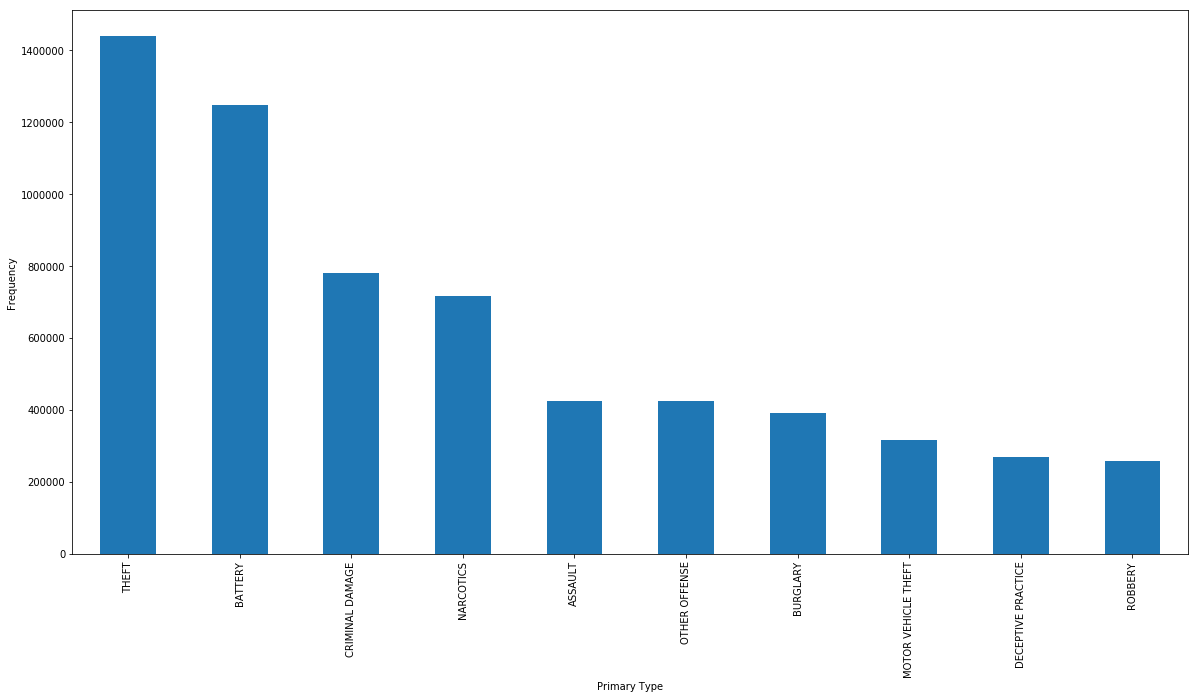

In [12]:
plt.figure(figsize=(20,10))
plt.ylabel('Frequency')
plt.xlabel('Type of Offence')
crime_type = crime_data.groupby([crime_data['Primary Type']]).size().sort_values(ascending=False).head(10)
crime_type.plot(kind='bar', style='seaborn-paper')

In [13]:
theft = crime_data[crime_data["Primary Type"]== 'THEFT']
theft.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"
6,2746421,HJ377410,05/15/2003 01:30:00 PM,020XX W ADAMS ST,0850,THEFT,ATTEMPT THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,...,2.0,28.0,06,1162662.0,1899079.0,2003,02/28/2018 03:56:25 PM,41.878727,-87.678199,"(41.878726928, -87.678199026)"
11,2746428,HJ383679,05/23/2003 10:30:00 PM,012XX W ADAMS ST,0890,THEFT,FROM BUILDING,OTHER,False,False,...,27.0,28.0,06,1168253.0,1899240.0,2003,02/28/2018 03:56:25 PM,41.879050,-87.657665,"(41.879049777, -87.657665406)"
18,2746437,HJ384029,05/23/2003 06:00:00 PM,009XX W SCHUBERT AVE,0810,THEFT,OVER $500,STREET,False,False,...,43.0,7.0,06,1169332.0,1918120.0,2003,02/28/2018 03:56:25 PM,41.930834,-87.653154,"(41.930834258, -87.653153852)"


In [15]:
t_G = theft.groupby([theft['Location Description']]).size().sort_values(ascending=False)
t_G.head(10)

Location Description
STREET                            393297
RESIDENCE                         150489
OTHER                              82079
PARKING LOT/GARAGE(NON.RESID.)     72662
DEPARTMENT STORE                   70542
APARTMENT                          69966
SMALL RETAIL STORE                 68651
GROCERY FOOD STORE                 56920
SIDEWALK                           45920
RESTAURANT                         40547
dtype: int64

Text(0, 0.5, 'Frequency')

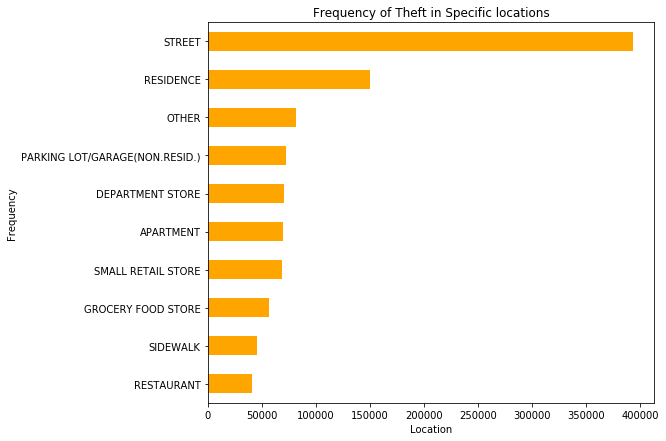

In [21]:
header = t_G.head(10).sort_values(ascending=True)
fig = plt.figure(figsize = (8, 7)) 
ax = fig.gca() 
header.plot(kind="barh", color="Orange", ax=ax)
ax.set_title("Frequency of Theft in Specific locations") 
ax.set_xlabel("Location") 
ax.set_ylabel("Frequency") 

Text(0, 0.5, 'Percentage of Crimes')

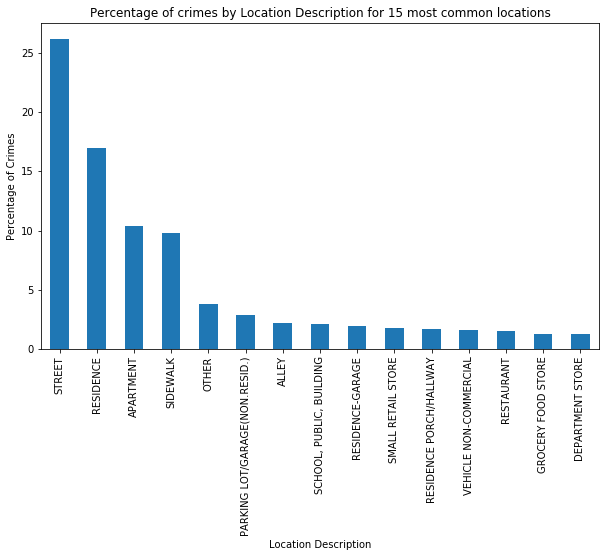

In [29]:
# Graph 1 : %crimes by location description (10 most common locations) 

percent = crime_data['Location Description'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Location Description for 15 most common locations') 
ax.set_xlabel('Location Description')
ax.set_ylabel('Percentage of Crimes')

Text(0, 0.5, 'Percentage of Crimes')

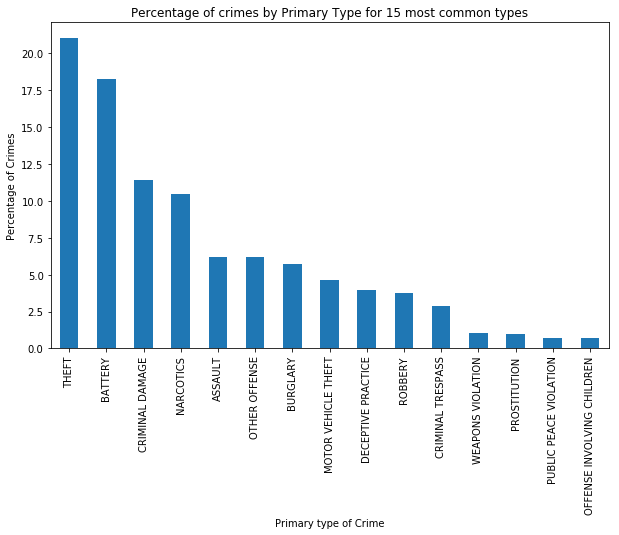

In [30]:
# Graph 2 : %crimes by crime type (10 most common crime types) 

percent = crime_data['Primary Type'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Primary Type for 15 most common types') 
ax.set_xlabel('Primary type of Crime')
ax.set_ylabel('Percentage of Crimes')

Text(0, 0.5, 'Percentage of Crimes')

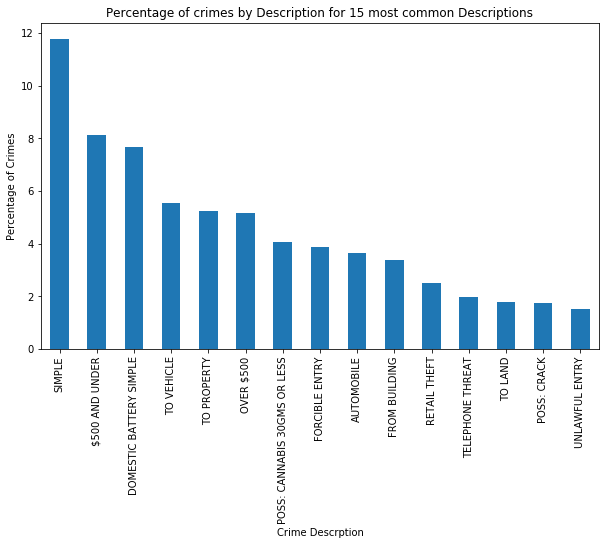

In [31]:
# Graph 3 : %crimes by Description 

percent = crime_data['Description'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Description for 15 most common Descriptions') 
ax.set_xlabel('Crime Descrption')
ax.set_ylabel('Percentage of Crimes')

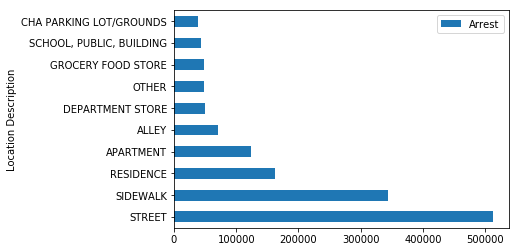

In [36]:
#Graph 4: Top ten places that an arrest is likely to occur in Chicago
foo = crime_data[['Location Description','Arrest']].groupby('Location Description').sum(axis=1).sort_values(by = 'Arrest',ascending = False)[:10]
foo.plot(kind='barh')


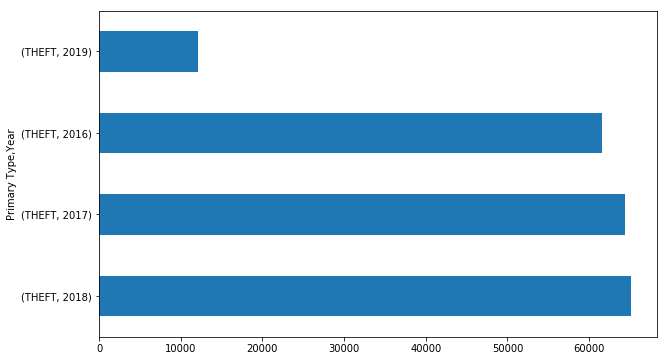

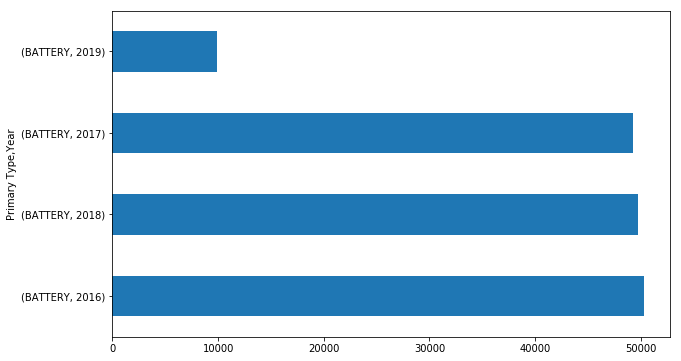

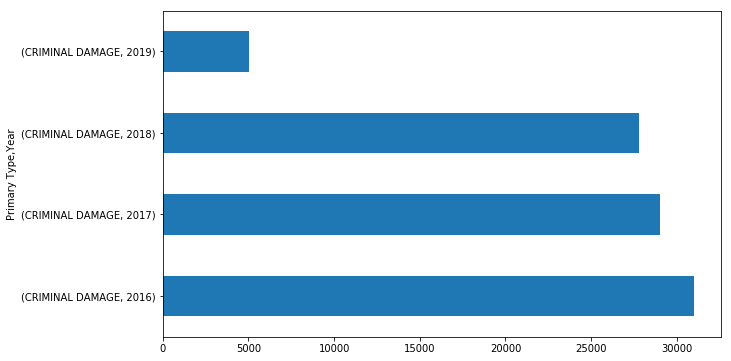

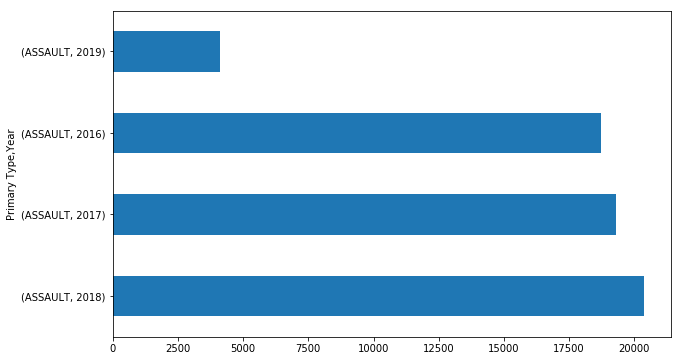

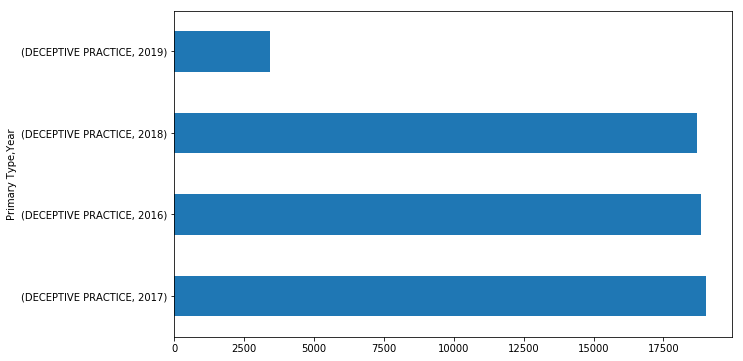

In [40]:
# Graph 5 : Number of crimes by year for top 10 crime types
year = crime_data['Year']
arrests_by_year_type = crime_data[crime_data['Year']>2015]
arrests_by_year_type = arrests_by_year_type.pivot_table('Arrest',index = 'Year',columns = 'Primary Type',aggfunc=np.size)
columns =  arrests_by_year_type.sum().sort_values(ascending=False).keys()[:5]

def plot_pivot_location_by_type(pivot_table,row):
    fig = plt.figure(figsize=(10,6)) 
    ax = fig.gca()
    pivot_table[[row]].sort_values(ascending= False)[:10].plot(kind='barh')

for col in columns:
    plot_pivot_location_by_type(arrests_by_year_type.unstack(),col)





In [44]:
crime_data['Date'] = pd.to_datetime(crime_data.Date, format="%m/%d/%Y %I:%M:%S %p")
crime_data['Month'] = crime_data['Date'].dt.month
crime_data['Time'] = crime_data['Date'].dt.hour

In [46]:
# Grouped the data by Year so we can do a Year by Year analusis on Primary Types of Theft
x = crime_data.groupby('Year')['Primary Type'].value_counts().to_frame()
x.rename(columns= {'Primary Type': 'Count'}, inplace=True)
x.reset_index(inplace=True)
x.head()

,Year,Primary Type,Count
0,2001,THEFT,99264
1,2001,BATTERY,93446
2,2001,CRIMINAL DAMAGE,55851
3,2001,NARCOTICS,50567
4,2001,ASSAULT,31384


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Text(0, 0.5, 'Frequency')

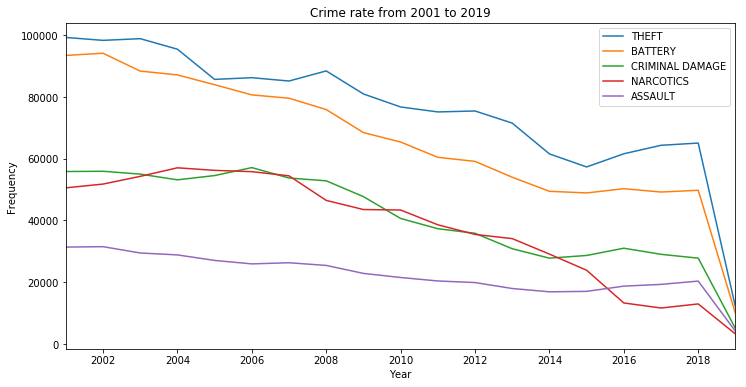

In [47]:
fig = plt.figure(figsize= (12,6))
ax = fig.gca()
theft = x[x['Primary Type']=='THEFT']
theft.rename(columns={'Count': 'THEFT'}, inplace= True)
battery = x[x['Primary Type']=='BATTERY']
battery.rename(columns={'Count': 'BATTERY'}, inplace= True)
crim = x[x['Primary Type']=='CRIMINAL DAMAGE']
crim.rename(columns={'Count': 'CRIMINAL DAMAGE'}, inplace= True)
narc = x[x['Primary Type']=='NARCOTICS']
narc.rename(columns={'Count': 'NARCOTICS'}, inplace= True)
assault = x[x['Primary Type']=='ASSAULT']
assault.rename(columns={'Count': 'ASSAULT'}, inplace= True)
theft.plot(kind = 'line', x = 'Year', y = 'THEFT', ax=ax,xticks=[2000,2002,2004,2006,2008,2010,2012,2014,2016, 2018,2020])
battery.plot(kind = 'line', x = 'Year', y = 'BATTERY', ax=ax)
crim.plot(kind = 'line', x = 'Year', y = 'CRIMINAL DAMAGE', ax=ax)
narc.plot(kind = 'line', x = 'Year', y = 'NARCOTICS', ax=ax)
assault.plot(kind = 'line', x = 'Year', y = 'ASSAULT', ax=ax)
ax.set_title('Crime rate from 2001 to 2019')
ax.set_ylabel('Frequency')

In [49]:
# we see about 40% arrest rate overall

old = crime_data[crime_data['Year']<2018]
old['Arrest'].value_counts()

False    4685006
True     1824844
Name: Arrest, dtype: int64

In [51]:
# In 2019, arrest rate is below 25%

recent = crime_data[crime_data['Year']>2017]
recent['Arrest'].value_counts()

False    253650
True      63542
Name: Arrest, dtype: int64

In [56]:
# A month by Month analysis of all the criminal activities in Chicago

month = crime_data.groupby('Month')['Month'].value_counts().to_frame()
month.rename(columns={'Month':'Count'},inplace=True)
month.reset_index(level=0, inplace=True)
month.reset_index(drop=True)
month.head()

,Month,Count
Month,,
1,1,546844
2,2,481120
3,3,571709
4,4,558400
5,5,602358


Text(0.5, 1.0, 'Criminal Activity by Month')

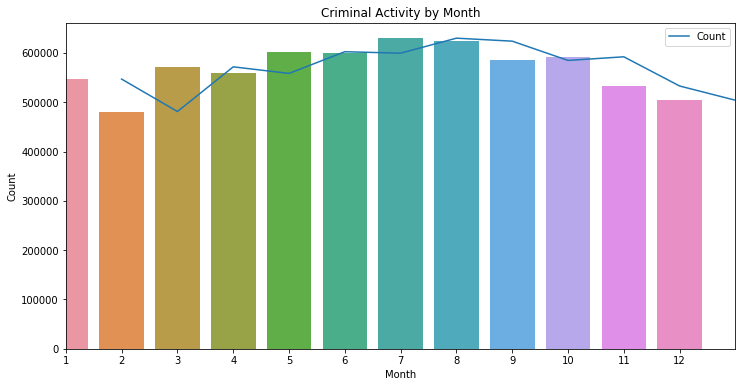

In [58]:
fig = plt.figure(figsize= (12,6))
ax = fig.gca()
sns.barplot(data = month, x = 'Month', y = 'Count',ax=ax)
month.plot(kind='line', x = 'Month', y = 'Count',ax=ax)
ax.set_title('Criminal Activity by Month')

In [60]:
# Analysis of all the criminal activities in Chicago by the Hour

time = crime_data.groupby('Time')['Time'].value_counts().to_frame()
time.rename(columns={'Time':'Count'},inplace=True)
time.reset_index(level=0, inplace=True)
time.reset_index(drop=True)
time['Time'] = time.replace(to_replace= 0 , value= 24)
time.sort_values(by = ['Time'], inplace=True, ascending=True)
time.head()

ValueError: 'Time' is both an index level and a column label, which is ambiguous.

KeyError: 'time'

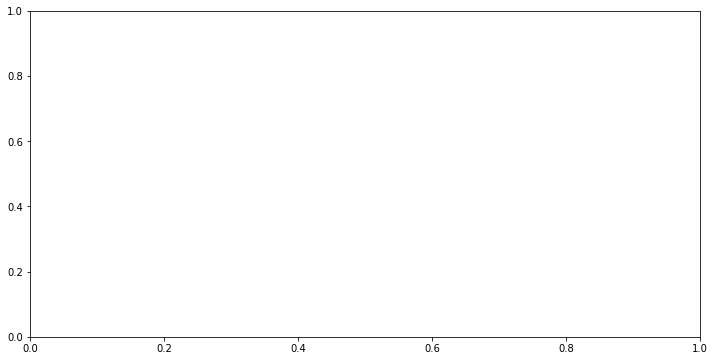

In [61]:
fig = plt.figure(figsize= (12,6))
ax = fig.gca()
time.plot(kind='line', x = 'time', y = 'Count',ax=ax)
sns.barplot(data = time, x = 'time', y = 'Count',ax=ax)
# sns.lineplot(data = time, x = 'time', y = 'Count',ax=ax)
ax.set_title('Criminal Activity by the hour')

In [62]:
# Most Dangerous Location to be in by the Hour

timeloc = crime_data.groupby(['time'])['Location Description'].value_counts().to_frame()
timeloc.rename(columns = {'Location Description': 'Count'}, inplace = True)
timeloc.reset_index(inplace = True)
timeloc.drop_duplicates(subset='time', inplace=True )

KeyError: 'time'

In [64]:
# Likelihood of getting Arrested for the top 20 crime types in Chicago

true = crime_data[crime_data['Arrest']==True]
false = crime_data[crime_data['Arrest']==False]
arrestt = crime_data['Primary Type'].value_counts().head(20).to_frame()
tru = true['Primary Type'].value_counts().to_frame()
fals = false['Primary Type'].value_counts().to_frame()

In [66]:
# Percentage of People getting arrested for these crimes

arrested_development = pd.merge(arrestt, tru, how= 'left', left_index= True, right_index=True)
arrested_development = pd.merge(arrested_development, fals, how= 'left', left_index= True, right_index=True)
arrested_development.rename(columns={'Primary Type_x':'Total','Primary Type_y':'Arrested','Primary Type': 'Not Arrested'}, inplace=True)
arrested_development['Percentage Arrested'] = (arrested_development['Arrested']/arrested_development['Total'])*100
arrested_development.reset_index(inplace=True)
arrested_development.rename(columns={'index': 'Primary Type'}, inplace=True)
arrested_development.sort_values(by=['Percentage Arrested'],inplace=True, ascending = False)
arrested_development

,Primary Type,Total,Arrested,Not Arrested,Percentage Arrested
12,PROSTITUTION,68549,68282,267,99.610498
3,NARCOTICS,716044,711834,4210,99.412047
18,GAMBLING,14437,14332,105,99.272702
19,LIQUOR LAW VIOLATION,14125,13998,127,99.100885
17,INTERFERENCE WITH PUBLIC OFFICER,15584,14310,1274,91.824949
11,WEAPONS VIOLATION,72568,57531,15037,79.278745
10,CRIMINAL TRESPASS,195678,142952,52726,73.054712
13,PUBLIC PEACE VIOLATION,48274,31008,17266,64.233335
16,SEX OFFENSE,25563,7777,17786,30.422877
4,ASSAULT,425168,97987,327181,23.046654


Text(0.5, 1.0, 'Percntage of cases where the convict got Arrested')

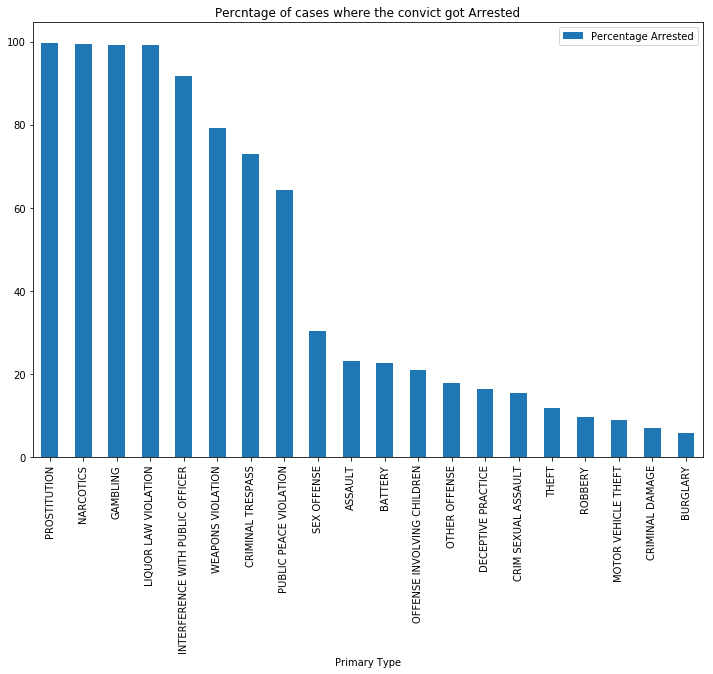

In [68]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
arrested_development.plot(kind = 'bar',x = 'Primary Type', y ='Percentage Arrested', ax=ax)
ax.set_title("Percntage of cases where the convict got Arrested")


In [69]:
arrested_development.reset_index(inplace=True)

Text(0.5, 0, 'Number of Instances')

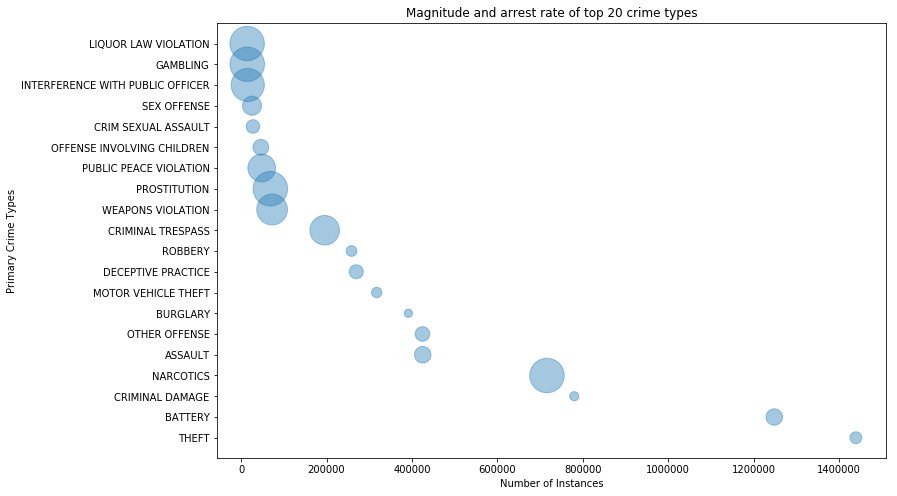

In [70]:
# Comparing Arrest Rate and frequency of Crime for top 20 crime types.

fig = plt.figure(figsize=(12,8))
ax = fig.gca()
arrested_development.plot(kind = 'scatter', y = 'index', x = 'Total', ax=ax, alpha = 0.4, s = 12*arrested_development['Percentage Arrested'])
label = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'ROBBERY', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'PROSTITUTION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'GAMBLING',
       'LIQUOR LAW VIOLATION']
ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
ax.set_yticklabels(label)
ax.set_title("Magnitude and arrest rate of top 20 crime types")
ax.set_ylabel('Primary Crime Types')
ax.set_xlabel('Number of Instances')